# check genes for low expression

In [1]:
import numpy as np
import pandas as pd

import helpers

In [2]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

In [3]:
rng = np.random.default_rng(seed=0)

# mixtures_tcga_skcm

In [4]:
mixtures_tcga_skcm = helpers.datasets.load_tcga_skcm()

In [37]:
(mixtures_tcga_skcm > 0).mean(axis=1).describe(percentiles=np.arange(0, 1, 0.1))

count    20531.000000
mean         0.837853
std          0.309027
min          0.000000
0%           0.000000
10%          0.209302
20%          0.701903
30%          0.968288
40%          0.997886
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
max          1.000000
dtype: float64

## CDF of nonzero expression rate

In [35]:
fig = px.ecdf(
    (mixtures_tcga_skcm > 0).mean(axis=1),
    title="CDF of fraction(gene expression > zero) in TCGA SKCM samples",
).update_layout(showlegend=False)

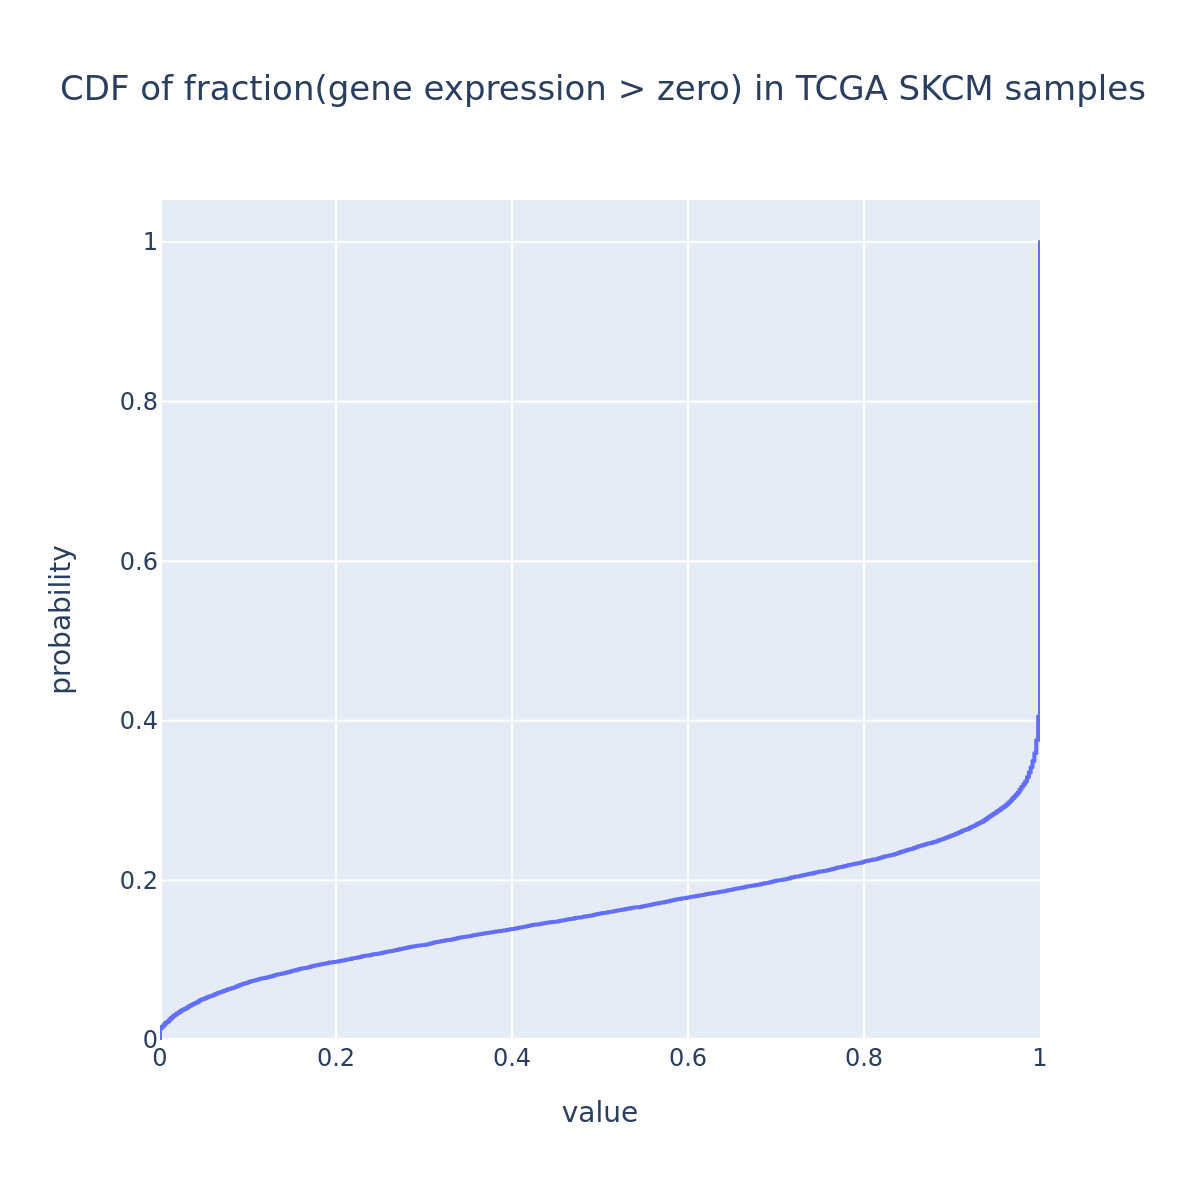

In [40]:
fig.show(width=600, height=600, scale=2, renderer='png')

## ridgeline plot of expression distribution by mean expression

In [7]:
(mixtures_tcga_skcm < 0.001).mean(axis=1)

gene_symbol
A1BG         0.000000
A1CF         0.877378
A2BP1        0.663848
A2LD1        0.000000
A2M          0.000000
               ...   
ZYX          0.000000
ZZEF1        0.000000
ZZZ3         0.000000
psiTPTE22    0.008457
tAKR         0.915433
Length: 20531, dtype: float64

In [8]:
(mixtures_tcga_skcm < 0.001).mean(axis=1).describe(percentiles=np.arange(0, 1, .1))

count    20531.000000
mean         0.162147
std          0.309027
min          0.000000
0%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.002114
70%          0.031712
80%          0.298097
90%          0.790698
max          1.000000
dtype: float64

In [9]:
sc_data, sc_metadata = helpers.datasets.load_jerby_arnon()

In [6]:
fractions = helpers.datasets.load_tcga_skcm_fractions_from_csx()

In [10]:
mixtures_in_silico, cell_type_geps = helpers.creating_mixtures.make_mixtures(
    sc_data, sc_metadata, fractions, n_cells_per_gep=5, normalization_factor=1_000_000, rng=rng
)

In [11]:
helpers.creating_mixtures.make_cell_type_geps(sc_data,
    sc_metadata,
    rng=rng)

,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
gene_symbol,,,,,,,,,
A1BG,15.625885,0.000000,43.995926,31.118817,0.000000,0.000000,0.000000,29.925746,0.000000
A1BG-AS1,0.000000,54.391390,0.000000,0.000000,0.000000,0.000000,96.002511,14.645853,0.000000
A1CF,0.000000,3.312319,0.957040,0.538598,0.124960,0.842519,2.042522,8.863666,6.111179
A2M,0.000000,286.221243,490.464748,200.024899,0.000000,11.626452,24.857150,27.978926,23.711317
A2M-AS1,0.000000,98.449251,13.190181,0.000000,0.000000,0.000000,0.000000,9.731150,148.170215
...,...,...,...,...,...,...,...,...,...
ZYG11A,92.605287,65.486560,67.722318,58.179899,1.912425,108.462343,178.013357,65.282202,140.111440
ZYG11B,149.201356,42.661922,104.303165,23.279210,49.201710,73.502338,87.912185,132.987633,143.319499
ZYX,46.003461,189.698043,106.309485,285.888222,249.993650,218.910734,114.909084,120.965320,192.637144


In [12]:
from helpers import columns

In [13]:
sc_metadata[columns.CELL_TYPE]

single_cell_id
CY106_CD45neg_CD90neg_10cells_S289          NaN
CY106_CD45neg_CD90neg_S291            Malignant
CY106_CD45neg_CD90neg_S292            Malignant
CY106_CD45neg_CD90neg_S294            Malignant
CY106_CD45neg_CD90neg_S297            Malignant
                                        ...    
monika_F5_S148_comb_BCD8_3                T CD8
monika_F6_S149_comb_BCD8_3                T CD8
monika_F7_S150_comb_BCD8_3                T CD8
monika_F8_S151_comb_BCD8_3                T CD8
monika_F9_S152_comb_BCD8_3                T CD8
Name: cell_type, Length: 7186, dtype: object